# Demonstração

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
from scipy.special import softmax
from gaussian_classifier import ExpectationMaximization, GaussianMixture, GreedyLearningGM, StepGM
from data import twospirals
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, precision_score, roc_curve
from matplotlib.colors import LogNorm
from sklearn import mixture

plt.rcParams['figure.figsize'] = [10, 10]

## Expectation-Maximization

In [9]:
x, y = twospirals(800,2,ts=np.pi,tinc=1,noise=0.5)
x1 = x[y == 0]

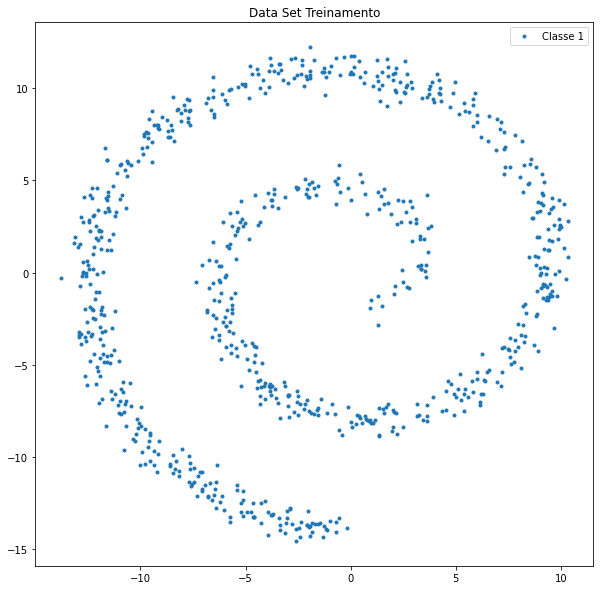

In [10]:
plt.figure()
plt.title('Data Set Treinamento')
plt.plot(x1[:,0], x1[:,1], '.', label='Classe 1')
plt.legend()
plt.show()

In [13]:
em = ExpectationMaximization(13, threshold=0.01, max_iter=100)

em.fit(x1)

[02-May-20 16:30:33] [INFO] [fit(146)] - Calculating EM with 13 clusters.
[02-May-20 16:30:33] [INFO] [fit(151)] - Iteration 1 - Expectation
[02-May-20 16:30:34] [INFO] [fit(159)] - Iteration 1 - Maximization
[02-May-20 16:30:34] [INFO] [fit(151)] - Iteration 2 - Expectation
[02-May-20 16:30:35] [INFO] [fit(159)] - Iteration 2 - Maximization
[02-May-20 16:30:36] [INFO] [fit(151)] - Iteration 3 - Expectation
[02-May-20 16:30:36] [INFO] [fit(159)] - Iteration 3 - Maximization
[02-May-20 16:30:37] [INFO] [fit(151)] - Iteration 4 - Expectation
[02-May-20 16:30:37] [INFO] [fit(159)] - Iteration 4 - Maximization
[02-May-20 16:30:38] [INFO] [fit(151)] - Iteration 5 - Expectation
[02-May-20 16:30:39] [INFO] [fit(159)] - Iteration 5 - Maximization
[02-May-20 16:30:39] [INFO] [fit(151)] - Iteration 6 - Expectation
[02-May-20 16:30:40] [INFO] [fit(159)] - Iteration 6 - Maximization
[02-May-20 16:30:40] [INFO] [fit(151)] - Iteration 7 - Expectation
[02-May-20 16:30:41] [INFO] [fit(159)] - Iteratio

[02-May-20 16:31:46] [INFO] [fit(159)] - Iteration 60 - Maximization
[02-May-20 16:31:47] [INFO] [fit(151)] - Iteration 61 - Expectation
[02-May-20 16:31:47] [INFO] [fit(159)] - Iteration 61 - Maximization
[02-May-20 16:31:48] [INFO] [fit(151)] - Iteration 62 - Expectation
[02-May-20 16:31:49] [INFO] [fit(159)] - Iteration 62 - Maximization
[02-May-20 16:31:49] [INFO] [fit(151)] - Iteration 63 - Expectation
[02-May-20 16:31:50] [INFO] [fit(159)] - Iteration 63 - Maximization
[02-May-20 16:31:51] [INFO] [fit(151)] - Iteration 64 - Expectation
[02-May-20 16:31:51] [INFO] [fit(159)] - Iteration 64 - Maximization
[02-May-20 16:31:52] [INFO] [fit(151)] - Iteration 65 - Expectation
[02-May-20 16:31:52] [INFO] [fit(159)] - Iteration 65 - Maximization
[02-May-20 16:31:53] [INFO] [fit(151)] - Iteration 66 - Expectation
[02-May-20 16:31:54] [INFO] [fit(159)] - Iteration 66 - Maximization
[02-May-20 16:31:54] [INFO] [fit(151)] - Iteration 67 - Expectation
[02-May-20 16:31:55] [INFO] [fit(159)] - 

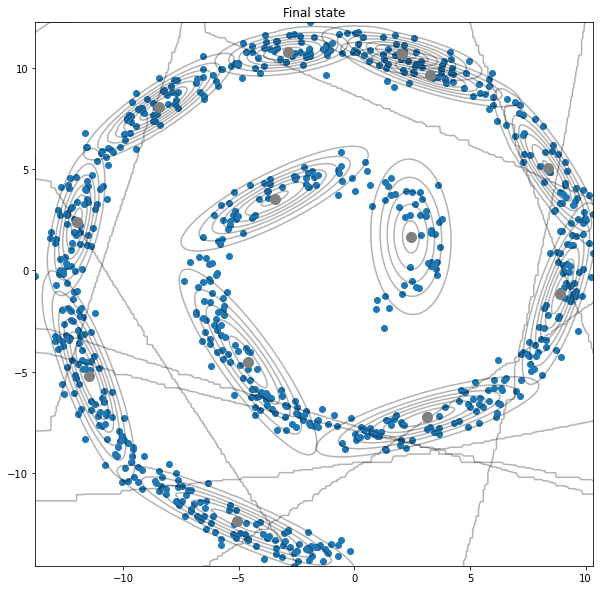

In [14]:
fig3 = plt.figure()
ax2 = fig3.add_subplot(111)
ax2.scatter(x1[:,0],x1[:,1])
x,y = np.meshgrid(np.sort(x1[:,0]),np.sort(x1[:,1]))
XY = np.array([x.flatten(),y.flatten()]).T
for c in em.cluster_stat:
    multi_normal = multivariate_normal(mean=c['mean'],cov=c['sigma'])
    ax2.contour(np.sort(x1[:,0]),np.sort(x1[:,1]),multi_normal.pdf(XY).reshape(len(x1),len(x1)),colors='black',alpha=0.3)
    ax2.scatter(c['mean'][0],c['mean'][1],c='grey',zorder=10,s=100)
    ax2.set_title('Final state')

## GaussianMixture with EM

In [110]:
x, y = twospirals(800,2,ts=np.pi,tinc=1,noise=0.5)
x_test, y_test = twospirals(1000,2,ts=np.pi,tinc=1,noise=0.5)

In [ ]:
scores = []
for k in range(1, 21):
    gm = GaussianMixture(clusters=(k, k))
    gm.fit(x, y)
    pred = gm.predict(x_test)
    scores.append(
        (
            k, 
            f1_score(y_test, pred, average='weighted'), 
            recall_score(y_test, pred, average='weighted'), 
            precision_score(y_test, pred, average='weighted')
        )
    )
    

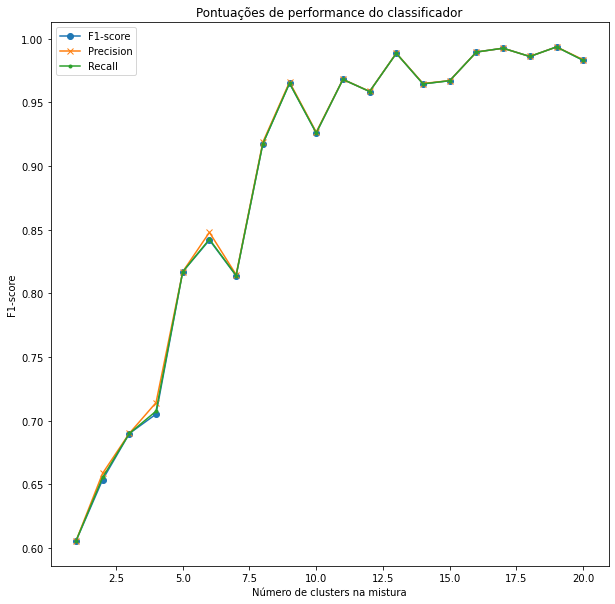

In [112]:
scores = np.array(scores)
plt.figure()
plt.title('Pontuações de performance do classificador')
plt.ylabel('F1-score')
plt.xlabel('Número de clusters na mistura')
plt.plot(scores[:,0], scores[:,1], 'o-', label='F1-score')
plt.plot(scores[:,0], scores[:,3], 'x-', label='Precision')
plt.plot(scores[:,0], scores[:,2], '.-', label='Recall')
plt.legend()
plt.show()

In [24]:
gm = GaussianMixture(clusters=(20, 20))
gm.fit(x, y)

pred = gm.predict(x_test)

[01-May-20 14:25:21] [INFO] [fit(136)] - Iteration 1 - Expectation
100%|███████████████████████████████████████████████████████████████████████████████| 800/800 [00:00<00:00, 898.25it/s]
[01-May-20 14:25:22] [INFO] [fit(144)] - Iteration 1 - Maximization
100%|███████████████████████████████████████████████████████████████████████████████| 800/800 [00:00<00:00, 883.41it/s]
[01-May-20 14:25:23] [INFO] [fit(136)] - Iteration 2 - Expectation
100%|███████████████████████████████████████████████████████████████████████████████| 800/800 [00:00<00:00, 898.25it/s]
[01-May-20 14:25:24] [INFO] [fit(144)] - Iteration 2 - Maximization
100%|███████████████████████████████████████████████████████████████████████████████| 800/800 [00:00<00:00, 910.45it/s]
[01-May-20 14:25:25] [INFO] [fit(168)] - Expectation-maximization algorithm converged with log-likelihood = 5.470653765506306 and error = -0.09321106869099172
[01-May-20 14:25:25] [INFO] [fit(136)] - Iteration 1 - Expectation
100%|███████████████████

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99      1000
         1.0       0.98      1.00      0.99      1000

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



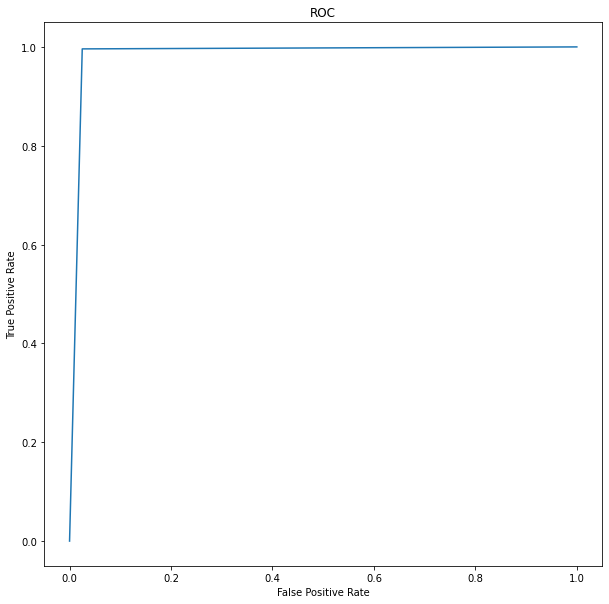

In [25]:
print(classification_report(y_test, pred))
fpr, tpr, _ = roc_curve(y_test, pred)
plt.figure() 
plt.title('ROC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot(fpr, tpr)
plt.show()

In [26]:
grid_size=200
grid_range=(-15, 15)
x_lab = np.linspace(grid_range[0], grid_range[1], num=grid_size)
y_lab = np.linspace(grid_range[0], grid_range[1], num=grid_size)
x1, x2 = np.meshgrid(x_lab, y_lab)
x_grid = np.transpose(np.vstack([x1.flatten(), x2.flatten()]))

y_hat = np.array(gm.predict_indexes(x_grid))
y_hat = y_hat.reshape([grid_size,grid_size])

100%|███████████████████████████████████████████████████████████████████████████| 40000/40000 [01:28<00:00, 451.16it/s]


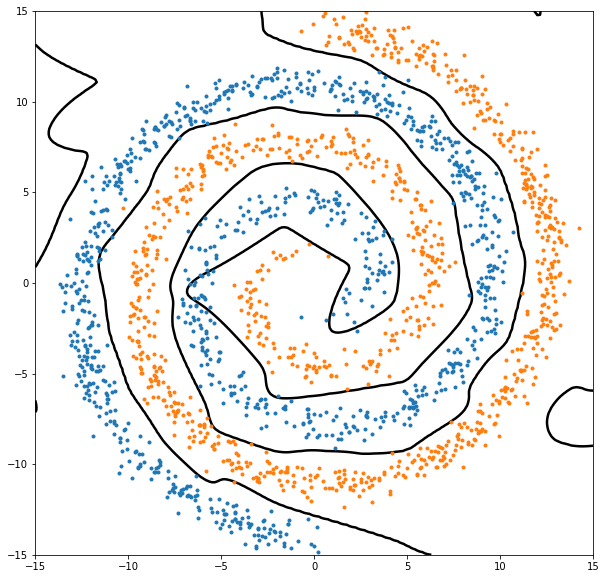

In [30]:
plt.figure()
plt.plot(x_test[y_test==0,0], x_test[y_test==0,1], '.', label='Classe 1')
plt.plot(x_test[y_test==1,0], x_test[y_test==1,1], '.', label='Classe 2')
plt.contour(x1, x2, y_hat, levels=[1], colors=('black',), linewidths=(2.5,))
plt.show()

## Greedy Algorithm

In [4]:
x, y = twospirals(800,2,ts=np.pi,tinc=1,noise=0.5)
x1 = x[y == 0]

In [ ]:
greedy = GreedyLearningGM(13, 13)
greedy.fit(x1)

ValueError: array must not contain infs or NaNs

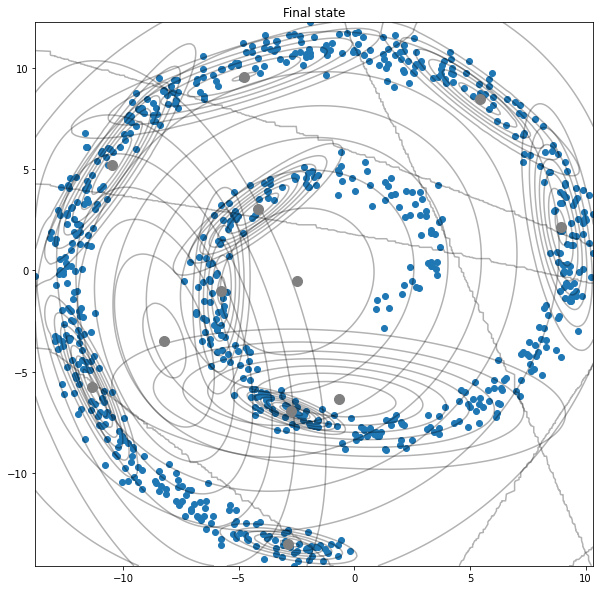

In [16]:
fig3 = plt.figure()
ax2 = fig3.add_subplot(111)
ax2.scatter(x1[:,0],x1[:,1])
x,y = np.meshgrid(np.sort(x1[:,0]),np.sort(x1[:,1]))
XY = np.array([x.flatten(),y.flatten()]).T
for c in greedy.cluster_stat:
    multi_normal = multivariate_normal(mean=c['mean'],cov=c['sigma'])
    ax2.contour(np.sort(x1[:,0]),np.sort(x1[:,1]),multi_normal.pdf(XY).reshape(len(x1),len(x1)),colors='black',alpha=0.3)
    ax2.scatter(c['mean'][0],c['mean'][1],c='grey',zorder=10,s=100)
    ax2.set_title('Final state')

Existe um problema de convergência observado para as primeiras amostras obtidas, para números de cluster mais baixos. No caso dessa forma em espiral, para k=1 e k=2, por exemplo, elas surgem no meio da distribuição, e quando chega a etapa de EM, com esses pontos como pontos iniciais, o algoritmo não consegue convergir esses pontos para dentro da forma da distribuição, e eles acabam continuando no mesmo ponto onde estão.

---

[01-May-20 23:51:16] [INFO] [fit(146)] - Calculating EM with 20 clusters.
[01-May-20 23:51:16] [INFO] [fit(151)] - Iteration 1 - Expectation
[01-May-20 23:51:17] [INFO] [fit(159)] - Iteration 1 - Maximization
[01-May-20 23:51:18] [INFO] [fit(151)] - Iteration 2 - Expectation
[01-May-20 23:51:19] [INFO] [fit(159)] - Iteration 2 - Maximization
[01-May-20 23:51:20] [INFO] [fit(151)] - Iteration 3 - Expectation
[01-May-20 23:51:21] [INFO] [fit(159)] - Iteration 3 - Maximization
[01-May-20 23:51:21] [INFO] [fit(151)] - Iteration 4 - Expectation
[01-May-20 23:51:22] [INFO] [fit(159)] - Iteration 4 - Maximization
[01-May-20 23:51:23] [INFO] [fit(151)] - Iteration 5 - Expectation
[01-May-20 23:51:24] [INFO] [fit(159)] - Iteration 5 - Maximization
[01-May-20 23:51:25] [INFO] [fit(151)] - Iteration 6 - Expectation
[01-May-20 23:51:26] [INFO] [fit(159)] - Iteration 6 - Maximization
[01-May-20 23:51:27] [INFO] [fit(151)] - Iteration 7 - Expectation
[01-May-20 23:51:28] [INFO] [fit(159)] - Iteratio

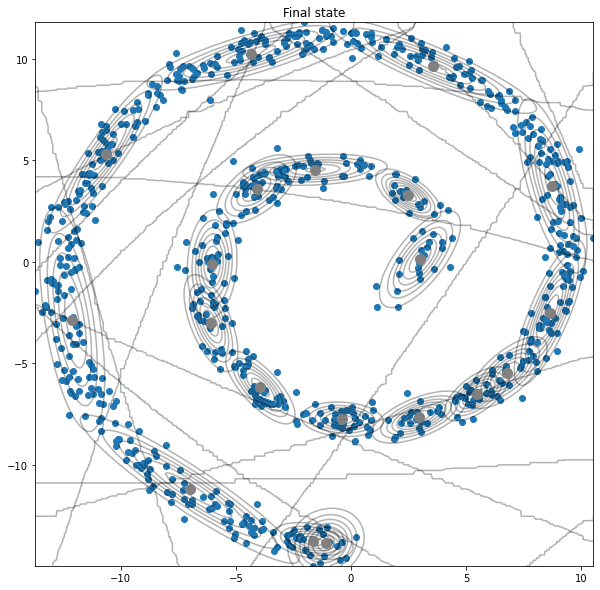

In [5]:
em = ExpectationMaximization(20, threshold=0.01, max_iter=20)

em.fit(x1)
fig3 = plt.figure()
ax2 = fig3.add_subplot(111)
ax2.scatter(x1[:,0],x1[:,1])
x,y = np.meshgrid(np.sort(x1[:,0]),np.sort(x1[:,1]))
XY = np.array([x.flatten(),y.flatten()]).T
for c in em.cluster_stat:
    multi_normal = multivariate_normal(mean=c['mean'],cov=c['sigma'])
    ax2.contour(np.sort(x1[:,0]),np.sort(x1[:,1]),multi_normal.pdf(XY).reshape(len(x1),len(x1)),colors='black',alpha=0.3)
    ax2.scatter(c['mean'][0],c['mean'][1],c='grey',zorder=10,s=100)
    ax2.set_title('Final state')

In [ ]:
sg = StepGM()
sg.fit(x1)

# Rotinas Diversas

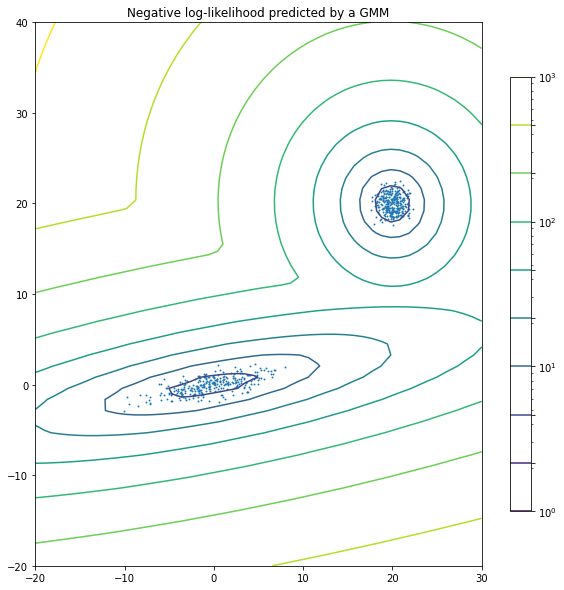

In [8]:
n_samples = 300

# generate spherical data centered on (20, 20)
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])

# generate zero centered stretched Gaussian data
C = np.array([[0., -0.7], [3.5, .7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)

# concatenate the two datasets into the final training set
X_train = np.vstack([shifted_gaussian, stretched_gaussian])

# fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=2, covariance_type='full')
clf.fit(X_train)

# display predicted scores by the model as a contour plot
x = np.linspace(-20., 30.)
y = np.linspace(-20., 40.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X_train[:, 0], X_train[:, 1], .8)

plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()

In [3]:
x, y = twospirals(800,2,ts=np.pi,tinc=1,noise=0.5)
x1 = x[y == 0]

In [21]:
likelihoods = []
for k in range(1, 21):
    em1 = ExpectationMaximization(k)
    em1.fit(x)
    likelihoods.append(
        (
            k, 
            em1.log_likelihood
        )
    )

[02-May-20 21:21:02] [INFO] [fit(146)] - Calculating EM with 1 clusters.
[02-May-20 21:21:02] [INFO] [fit(151)] - Iteration 1 - Expectation
[02-May-20 21:21:02] [INFO] [fit(159)] - Iteration 1 - Maximization
[02-May-20 21:21:03] [INFO] [fit(151)] - Iteration 2 - Expectation
[02-May-20 21:21:03] [INFO] [fit(159)] - Iteration 2 - Maximization
[02-May-20 21:21:03] [INFO] [fit(183)] - Expectation-maximization algorithm converged in 1 iterations with log-likelihood = -10933.231422876019 and error = 0.0
[02-May-20 21:21:03] [INFO] [fit(146)] - Calculating EM with 2 clusters.
[02-May-20 21:21:03] [INFO] [fit(151)] - Iteration 1 - Expectation
[02-May-20 21:21:03] [INFO] [fit(159)] - Iteration 1 - Maximization
[02-May-20 21:21:03] [INFO] [fit(151)] - Iteration 2 - Expectation
[02-May-20 21:21:04] [INFO] [fit(159)] - Iteration 2 - Maximization
[02-May-20 21:21:04] [INFO] [fit(151)] - Iteration 3 - Expectation
[02-May-20 21:21:04] [INFO] [fit(159)] - Iteration 3 - Maximization
[02-May-20 21:21:04

[02-May-20 21:21:26] [INFO] [fit(151)] - Iteration 57 - Expectation
[02-May-20 21:21:26] [INFO] [fit(159)] - Iteration 57 - Maximization
[02-May-20 21:21:27] [INFO] [fit(151)] - Iteration 58 - Expectation
[02-May-20 21:21:27] [INFO] [fit(159)] - Iteration 58 - Maximization
[02-May-20 21:21:27] [INFO] [fit(151)] - Iteration 59 - Expectation
[02-May-20 21:21:27] [INFO] [fit(159)] - Iteration 59 - Maximization
[02-May-20 21:21:27] [INFO] [fit(151)] - Iteration 60 - Expectation
[02-May-20 21:21:28] [INFO] [fit(159)] - Iteration 60 - Maximization
[02-May-20 21:21:28] [INFO] [fit(151)] - Iteration 61 - Expectation
[02-May-20 21:21:28] [INFO] [fit(159)] - Iteration 61 - Maximization
[02-May-20 21:21:28] [INFO] [fit(151)] - Iteration 62 - Expectation
[02-May-20 21:21:28] [INFO] [fit(159)] - Iteration 62 - Maximization
[02-May-20 21:21:29] [INFO] [fit(151)] - Iteration 63 - Expectation
[02-May-20 21:21:29] [INFO] [fit(159)] - Iteration 63 - Maximization
[02-May-20 21:21:29] [INFO] [fit(151)] - 

[02-May-20 21:21:53] [INFO] [fit(159)] - Iteration 15 - Maximization
[02-May-20 21:21:53] [INFO] [fit(151)] - Iteration 16 - Expectation
[02-May-20 21:21:54] [INFO] [fit(159)] - Iteration 16 - Maximization
[02-May-20 21:21:54] [INFO] [fit(151)] - Iteration 17 - Expectation
[02-May-20 21:21:54] [INFO] [fit(159)] - Iteration 17 - Maximization
[02-May-20 21:21:55] [INFO] [fit(151)] - Iteration 18 - Expectation
[02-May-20 21:21:55] [INFO] [fit(159)] - Iteration 18 - Maximization
[02-May-20 21:21:55] [INFO] [fit(151)] - Iteration 19 - Expectation
[02-May-20 21:21:56] [INFO] [fit(159)] - Iteration 19 - Maximization
[02-May-20 21:21:56] [INFO] [fit(151)] - Iteration 20 - Expectation
[02-May-20 21:21:56] [INFO] [fit(159)] - Iteration 20 - Maximization
[02-May-20 21:21:57] [INFO] [fit(151)] - Iteration 21 - Expectation
[02-May-20 21:21:57] [INFO] [fit(159)] - Iteration 21 - Maximization
[02-May-20 21:21:57] [INFO] [fit(151)] - Iteration 22 - Expectation
[02-May-20 21:21:58] [INFO] [fit(159)] - 

[02-May-20 21:22:31] [INFO] [fit(151)] - Iteration 12 - Expectation
[02-May-20 21:22:31] [INFO] [fit(159)] - Iteration 12 - Maximization
[02-May-20 21:22:31] [INFO] [fit(151)] - Iteration 13 - Expectation
[02-May-20 21:22:32] [INFO] [fit(159)] - Iteration 13 - Maximization
[02-May-20 21:22:32] [INFO] [fit(151)] - Iteration 14 - Expectation
[02-May-20 21:22:32] [INFO] [fit(159)] - Iteration 14 - Maximization
[02-May-20 21:22:33] [INFO] [fit(151)] - Iteration 15 - Expectation
[02-May-20 21:22:33] [INFO] [fit(159)] - Iteration 15 - Maximization
[02-May-20 21:22:34] [INFO] [fit(151)] - Iteration 16 - Expectation
[02-May-20 21:22:34] [INFO] [fit(159)] - Iteration 16 - Maximization
[02-May-20 21:22:34] [INFO] [fit(151)] - Iteration 17 - Expectation
[02-May-20 21:22:35] [INFO] [fit(159)] - Iteration 17 - Maximization
[02-May-20 21:22:35] [INFO] [fit(151)] - Iteration 18 - Expectation
[02-May-20 21:22:36] [INFO] [fit(159)] - Iteration 18 - Maximization
[02-May-20 21:22:36] [INFO] [fit(151)] - 

[02-May-20 21:23:22] [INFO] [fit(159)] - Iteration 31 - Maximization
[02-May-20 21:23:22] [INFO] [fit(151)] - Iteration 32 - Expectation
[02-May-20 21:23:23] [INFO] [fit(159)] - Iteration 32 - Maximization
[02-May-20 21:23:23] [INFO] [fit(151)] - Iteration 33 - Expectation
[02-May-20 21:23:24] [INFO] [fit(159)] - Iteration 33 - Maximization
[02-May-20 21:23:24] [INFO] [fit(151)] - Iteration 34 - Expectation
[02-May-20 21:23:25] [INFO] [fit(159)] - Iteration 34 - Maximization
[02-May-20 21:23:25] [INFO] [fit(151)] - Iteration 35 - Expectation
[02-May-20 21:23:26] [INFO] [fit(159)] - Iteration 35 - Maximization
[02-May-20 21:23:26] [INFO] [fit(151)] - Iteration 36 - Expectation
[02-May-20 21:23:27] [INFO] [fit(159)] - Iteration 36 - Maximization
[02-May-20 21:23:27] [INFO] [fit(151)] - Iteration 37 - Expectation
[02-May-20 21:23:28] [INFO] [fit(159)] - Iteration 37 - Maximization
[02-May-20 21:23:28] [INFO] [fit(151)] - Iteration 38 - Expectation
[02-May-20 21:23:29] [INFO] [fit(159)] - 

[02-May-20 21:24:23] [INFO] [fit(159)] - Iteration 91 - Maximization
[02-May-20 21:24:23] [INFO] [fit(151)] - Iteration 92 - Expectation
[02-May-20 21:24:24] [INFO] [fit(159)] - Iteration 92 - Maximization
[02-May-20 21:24:24] [INFO] [fit(151)] - Iteration 93 - Expectation
[02-May-20 21:24:25] [INFO] [fit(159)] - Iteration 93 - Maximization
[02-May-20 21:24:26] [INFO] [fit(151)] - Iteration 94 - Expectation
[02-May-20 21:24:26] [INFO] [fit(159)] - Iteration 94 - Maximization
[02-May-20 21:24:27] [INFO] [fit(151)] - Iteration 95 - Expectation
[02-May-20 21:24:27] [INFO] [fit(159)] - Iteration 95 - Maximization
[02-May-20 21:24:28] [INFO] [fit(151)] - Iteration 96 - Expectation
[02-May-20 21:24:28] [INFO] [fit(159)] - Iteration 96 - Maximization
[02-May-20 21:24:29] [INFO] [fit(151)] - Iteration 97 - Expectation
[02-May-20 21:24:30] [INFO] [fit(159)] - Iteration 97 - Maximization
[02-May-20 21:24:31] [INFO] [fit(151)] - Iteration 98 - Expectation
[02-May-20 21:24:31] [INFO] [fit(159)] - 

[02-May-20 21:25:33] [INFO] [fit(151)] - Iteration 50 - Expectation
[02-May-20 21:25:33] [INFO] [fit(159)] - Iteration 50 - Maximization
[02-May-20 21:25:34] [INFO] [fit(151)] - Iteration 51 - Expectation
[02-May-20 21:25:34] [INFO] [fit(159)] - Iteration 51 - Maximization
[02-May-20 21:25:35] [INFO] [fit(151)] - Iteration 52 - Expectation
[02-May-20 21:25:36] [INFO] [fit(159)] - Iteration 52 - Maximization
[02-May-20 21:25:36] [INFO] [fit(151)] - Iteration 53 - Expectation
[02-May-20 21:25:37] [INFO] [fit(159)] - Iteration 53 - Maximization
[02-May-20 21:25:37] [INFO] [fit(151)] - Iteration 54 - Expectation
[02-May-20 21:25:38] [INFO] [fit(159)] - Iteration 54 - Maximization
[02-May-20 21:25:38] [INFO] [fit(151)] - Iteration 55 - Expectation
[02-May-20 21:25:39] [INFO] [fit(159)] - Iteration 55 - Maximization
[02-May-20 21:25:40] [INFO] [fit(151)] - Iteration 56 - Expectation
[02-May-20 21:25:40] [INFO] [fit(159)] - Iteration 56 - Maximization
[02-May-20 21:25:41] [INFO] [fit(151)] - 

[02-May-20 21:26:41] [INFO] [fit(159)] - Iteration 8 - Maximization
[02-May-20 21:26:42] [INFO] [fit(151)] - Iteration 9 - Expectation
[02-May-20 21:26:42] [INFO] [fit(159)] - Iteration 9 - Maximization
[02-May-20 21:26:43] [INFO] [fit(151)] - Iteration 10 - Expectation
[02-May-20 21:26:44] [INFO] [fit(159)] - Iteration 10 - Maximization
[02-May-20 21:26:44] [INFO] [fit(151)] - Iteration 11 - Expectation
[02-May-20 21:26:45] [INFO] [fit(159)] - Iteration 11 - Maximization
[02-May-20 21:26:46] [INFO] [fit(151)] - Iteration 12 - Expectation
[02-May-20 21:26:46] [INFO] [fit(159)] - Iteration 12 - Maximization
[02-May-20 21:26:47] [INFO] [fit(151)] - Iteration 13 - Expectation
[02-May-20 21:26:48] [INFO] [fit(159)] - Iteration 13 - Maximization
[02-May-20 21:26:48] [INFO] [fit(151)] - Iteration 14 - Expectation
[02-May-20 21:26:49] [INFO] [fit(159)] - Iteration 14 - Maximization
[02-May-20 21:26:50] [INFO] [fit(151)] - Iteration 15 - Expectation
[02-May-20 21:26:50] [INFO] [fit(159)] - Ite

[02-May-20 21:28:01] [INFO] [fit(159)] - Iteration 68 - Maximization
[02-May-20 21:28:01] [INFO] [fit(151)] - Iteration 69 - Expectation
[02-May-20 21:28:02] [INFO] [fit(159)] - Iteration 69 - Maximization
[02-May-20 21:28:03] [INFO] [fit(151)] - Iteration 70 - Expectation
[02-May-20 21:28:03] [INFO] [fit(159)] - Iteration 70 - Maximization
[02-May-20 21:28:04] [INFO] [fit(151)] - Iteration 71 - Expectation
[02-May-20 21:28:05] [INFO] [fit(159)] - Iteration 71 - Maximization
[02-May-20 21:28:05] [INFO] [fit(151)] - Iteration 72 - Expectation
[02-May-20 21:28:06] [INFO] [fit(159)] - Iteration 72 - Maximization
[02-May-20 21:28:07] [INFO] [fit(151)] - Iteration 73 - Expectation
[02-May-20 21:28:07] [INFO] [fit(159)] - Iteration 73 - Maximization
[02-May-20 21:28:08] [INFO] [fit(151)] - Iteration 74 - Expectation
[02-May-20 21:28:09] [INFO] [fit(159)] - Iteration 74 - Maximization
[02-May-20 21:28:09] [INFO] [fit(151)] - Iteration 75 - Expectation
[02-May-20 21:28:10] [INFO] [fit(159)] - 

[02-May-20 21:29:24] [INFO] [fit(151)] - Iteration 27 - Expectation
[02-May-20 21:29:25] [INFO] [fit(159)] - Iteration 27 - Maximization
[02-May-20 21:29:26] [INFO] [fit(151)] - Iteration 28 - Expectation
[02-May-20 21:29:27] [INFO] [fit(159)] - Iteration 28 - Maximization
[02-May-20 21:29:27] [INFO] [fit(151)] - Iteration 29 - Expectation
[02-May-20 21:29:28] [INFO] [fit(159)] - Iteration 29 - Maximization
[02-May-20 21:29:29] [INFO] [fit(151)] - Iteration 30 - Expectation
[02-May-20 21:29:30] [INFO] [fit(159)] - Iteration 30 - Maximization
[02-May-20 21:29:30] [INFO] [fit(151)] - Iteration 31 - Expectation
[02-May-20 21:29:31] [INFO] [fit(159)] - Iteration 31 - Maximization
[02-May-20 21:29:32] [INFO] [fit(151)] - Iteration 32 - Expectation
[02-May-20 21:29:33] [INFO] [fit(159)] - Iteration 32 - Maximization
[02-May-20 21:29:33] [INFO] [fit(151)] - Iteration 33 - Expectation
[02-May-20 21:29:34] [INFO] [fit(159)] - Iteration 33 - Maximization
[02-May-20 21:29:35] [INFO] [fit(151)] - 

[02-May-20 21:30:55] [INFO] [fit(151)] - Iteration 87 - Expectation
[02-May-20 21:30:55] [INFO] [fit(159)] - Iteration 87 - Maximization
[02-May-20 21:30:56] [INFO] [fit(151)] - Iteration 88 - Expectation
[02-May-20 21:30:57] [INFO] [fit(159)] - Iteration 88 - Maximization
[02-May-20 21:30:58] [INFO] [fit(151)] - Iteration 89 - Expectation
[02-May-20 21:30:58] [INFO] [fit(159)] - Iteration 89 - Maximization
[02-May-20 21:30:59] [INFO] [fit(151)] - Iteration 90 - Expectation
[02-May-20 21:31:00] [INFO] [fit(159)] - Iteration 90 - Maximization
[02-May-20 21:31:01] [INFO] [fit(151)] - Iteration 91 - Expectation
[02-May-20 21:31:01] [INFO] [fit(159)] - Iteration 91 - Maximization
[02-May-20 21:31:02] [INFO] [fit(151)] - Iteration 92 - Expectation
[02-May-20 21:31:03] [INFO] [fit(159)] - Iteration 92 - Maximization
[02-May-20 21:31:04] [INFO] [fit(151)] - Iteration 93 - Expectation
[02-May-20 21:31:04] [INFO] [fit(159)] - Iteration 93 - Maximization
[02-May-20 21:31:05] [INFO] [fit(151)] - 

[02-May-20 21:32:32] [INFO] [fit(159)] - Iteration 49 - Maximization
[02-May-20 21:32:32] [INFO] [fit(151)] - Iteration 50 - Expectation
[02-May-20 21:32:33] [INFO] [fit(159)] - Iteration 50 - Maximization
[02-May-20 21:32:34] [INFO] [fit(151)] - Iteration 51 - Expectation
[02-May-20 21:32:35] [INFO] [fit(159)] - Iteration 51 - Maximization
[02-May-20 21:32:36] [INFO] [fit(151)] - Iteration 52 - Expectation
[02-May-20 21:32:37] [INFO] [fit(159)] - Iteration 52 - Maximization
[02-May-20 21:32:38] [INFO] [fit(151)] - Iteration 53 - Expectation
[02-May-20 21:32:38] [INFO] [fit(159)] - Iteration 53 - Maximization
[02-May-20 21:32:39] [INFO] [fit(151)] - Iteration 54 - Expectation
[02-May-20 21:32:40] [INFO] [fit(159)] - Iteration 54 - Maximization
[02-May-20 21:32:41] [INFO] [fit(151)] - Iteration 55 - Expectation
[02-May-20 21:32:42] [INFO] [fit(159)] - Iteration 55 - Maximization
[02-May-20 21:32:43] [INFO] [fit(151)] - Iteration 56 - Expectation
[02-May-20 21:32:44] [INFO] [fit(159)] - 

[02-May-20 21:34:20] [INFO] [fit(151)] - Iteration 45 - Expectation
[02-May-20 21:34:21] [INFO] [fit(159)] - Iteration 45 - Maximization
[02-May-20 21:34:22] [INFO] [fit(151)] - Iteration 46 - Expectation
[02-May-20 21:34:23] [INFO] [fit(159)] - Iteration 46 - Maximization
[02-May-20 21:34:24] [INFO] [fit(151)] - Iteration 47 - Expectation
[02-May-20 21:34:25] [INFO] [fit(159)] - Iteration 47 - Maximization
[02-May-20 21:34:26] [INFO] [fit(151)] - Iteration 48 - Expectation
[02-May-20 21:34:26] [INFO] [fit(159)] - Iteration 48 - Maximization
[02-May-20 21:34:27] [INFO] [fit(151)] - Iteration 49 - Expectation
[02-May-20 21:34:28] [INFO] [fit(159)] - Iteration 49 - Maximization
[02-May-20 21:34:29] [INFO] [fit(151)] - Iteration 50 - Expectation
[02-May-20 21:34:30] [INFO] [fit(159)] - Iteration 50 - Maximization
[02-May-20 21:34:31] [INFO] [fit(151)] - Iteration 51 - Expectation
[02-May-20 21:34:32] [INFO] [fit(159)] - Iteration 51 - Maximization
[02-May-20 21:34:33] [INFO] [fit(151)] - 

[02-May-20 21:36:12] [INFO] [fit(151)] - Iteration 3 - Expectation
[02-May-20 21:36:13] [INFO] [fit(159)] - Iteration 3 - Maximization
[02-May-20 21:36:14] [INFO] [fit(151)] - Iteration 4 - Expectation
[02-May-20 21:36:15] [INFO] [fit(159)] - Iteration 4 - Maximization
[02-May-20 21:36:16] [INFO] [fit(151)] - Iteration 5 - Expectation
[02-May-20 21:36:17] [INFO] [fit(159)] - Iteration 5 - Maximization
[02-May-20 21:36:18] [INFO] [fit(151)] - Iteration 6 - Expectation
[02-May-20 21:36:20] [INFO] [fit(159)] - Iteration 6 - Maximization
[02-May-20 21:36:21] [INFO] [fit(151)] - Iteration 7 - Expectation
[02-May-20 21:36:22] [INFO] [fit(159)] - Iteration 7 - Maximization
[02-May-20 21:36:23] [INFO] [fit(151)] - Iteration 8 - Expectation
[02-May-20 21:36:24] [INFO] [fit(159)] - Iteration 8 - Maximization
[02-May-20 21:36:25] [INFO] [fit(151)] - Iteration 9 - Expectation
[02-May-20 21:36:26] [INFO] [fit(159)] - Iteration 9 - Maximization
[02-May-20 21:36:27] [INFO] [fit(151)] - Iteration 10 -

[02-May-20 21:38:13] [INFO] [fit(151)] - Iteration 63 - Expectation
[02-May-20 21:38:14] [INFO] [fit(159)] - Iteration 63 - Maximization
[02-May-20 21:38:15] [INFO] [fit(151)] - Iteration 64 - Expectation
[02-May-20 21:38:16] [INFO] [fit(159)] - Iteration 64 - Maximization
[02-May-20 21:38:17] [INFO] [fit(151)] - Iteration 65 - Expectation
[02-May-20 21:38:18] [INFO] [fit(159)] - Iteration 65 - Maximization
[02-May-20 21:38:19] [INFO] [fit(151)] - Iteration 66 - Expectation
[02-May-20 21:38:20] [INFO] [fit(159)] - Iteration 66 - Maximization
[02-May-20 21:38:21] [INFO] [fit(151)] - Iteration 67 - Expectation
[02-May-20 21:38:22] [INFO] [fit(159)] - Iteration 67 - Maximization
[02-May-20 21:38:23] [INFO] [fit(151)] - Iteration 68 - Expectation
[02-May-20 21:38:24] [INFO] [fit(159)] - Iteration 68 - Maximization
[02-May-20 21:38:25] [INFO] [fit(151)] - Iteration 69 - Expectation
[02-May-20 21:38:26] [INFO] [fit(159)] - Iteration 69 - Maximization
[02-May-20 21:38:27] [INFO] [fit(151)] - 

[02-May-20 21:40:15] [INFO] [fit(159)] - Iteration 21 - Maximization
[02-May-20 21:40:16] [INFO] [fit(151)] - Iteration 22 - Expectation
[02-May-20 21:40:17] [INFO] [fit(159)] - Iteration 22 - Maximization
[02-May-20 21:40:18] [INFO] [fit(151)] - Iteration 23 - Expectation
[02-May-20 21:40:19] [INFO] [fit(159)] - Iteration 23 - Maximization
[02-May-20 21:40:21] [INFO] [fit(151)] - Iteration 24 - Expectation
[02-May-20 21:40:22] [INFO] [fit(159)] - Iteration 24 - Maximization
[02-May-20 21:40:23] [INFO] [fit(151)] - Iteration 25 - Expectation
[02-May-20 21:40:24] [INFO] [fit(159)] - Iteration 25 - Maximization
[02-May-20 21:40:25] [INFO] [fit(151)] - Iteration 26 - Expectation
[02-May-20 21:40:26] [INFO] [fit(159)] - Iteration 26 - Maximization
[02-May-20 21:40:27] [INFO] [fit(151)] - Iteration 27 - Expectation
[02-May-20 21:40:28] [INFO] [fit(159)] - Iteration 27 - Maximization
[02-May-20 21:40:29] [INFO] [fit(151)] - Iteration 28 - Expectation
[02-May-20 21:40:30] [INFO] [fit(159)] - 

[02-May-20 21:42:27] [INFO] [fit(159)] - Iteration 81 - Maximization
[02-May-20 21:42:28] [INFO] [fit(151)] - Iteration 82 - Expectation
[02-May-20 21:42:29] [INFO] [fit(159)] - Iteration 82 - Maximization
[02-May-20 21:42:30] [INFO] [fit(151)] - Iteration 83 - Expectation
[02-May-20 21:42:31] [INFO] [fit(159)] - Iteration 83 - Maximization
[02-May-20 21:42:33] [INFO] [fit(151)] - Iteration 84 - Expectation
[02-May-20 21:42:34] [INFO] [fit(159)] - Iteration 84 - Maximization
[02-May-20 21:42:35] [INFO] [fit(151)] - Iteration 85 - Expectation
[02-May-20 21:42:36] [INFO] [fit(159)] - Iteration 85 - Maximization
[02-May-20 21:42:37] [INFO] [fit(151)] - Iteration 86 - Expectation
[02-May-20 21:42:38] [INFO] [fit(159)] - Iteration 86 - Maximization
[02-May-20 21:42:39] [INFO] [fit(151)] - Iteration 87 - Expectation
[02-May-20 21:42:40] [INFO] [fit(159)] - Iteration 87 - Maximization
[02-May-20 21:42:41] [INFO] [fit(151)] - Iteration 88 - Expectation
[02-May-20 21:42:43] [INFO] [fit(159)] - 

[02-May-20 21:44:45] [INFO] [fit(151)] - Iteration 40 - Expectation
[02-May-20 21:44:46] [INFO] [fit(159)] - Iteration 40 - Maximization
[02-May-20 21:44:47] [INFO] [fit(151)] - Iteration 41 - Expectation
[02-May-20 21:44:48] [INFO] [fit(159)] - Iteration 41 - Maximization
[02-May-20 21:44:50] [INFO] [fit(151)] - Iteration 42 - Expectation
[02-May-20 21:44:51] [INFO] [fit(159)] - Iteration 42 - Maximization
[02-May-20 21:44:52] [INFO] [fit(151)] - Iteration 43 - Expectation
[02-May-20 21:44:53] [INFO] [fit(159)] - Iteration 43 - Maximization
[02-May-20 21:44:54] [INFO] [fit(151)] - Iteration 44 - Expectation
[02-May-20 21:44:55] [INFO] [fit(159)] - Iteration 44 - Maximization
[02-May-20 21:44:57] [INFO] [fit(151)] - Iteration 45 - Expectation
[02-May-20 21:44:58] [INFO] [fit(159)] - Iteration 45 - Maximization
[02-May-20 21:44:59] [INFO] [fit(151)] - Iteration 46 - Expectation
[02-May-20 21:45:00] [INFO] [fit(159)] - Iteration 46 - Maximization
[02-May-20 21:45:02] [INFO] [fit(151)] - 

[02-May-20 21:47:10] [INFO] [fit(151)] - Iteration 100 - Expectation
[02-May-20 21:47:11] [INFO] [fit(159)] - Iteration 100 - Maximization
[02-May-20 21:47:13] [INFO] [fit(183)] - Expectation-maximization algorithm converged in 99 iterations with log-likelihood = -10188.311074378558 and error = 0.0971993245802878
[02-May-20 21:47:13] [INFO] [fit(146)] - Calculating EM with 14 clusters.
[02-May-20 21:47:13] [INFO] [fit(151)] - Iteration 1 - Expectation
[02-May-20 21:47:14] [INFO] [fit(159)] - Iteration 1 - Maximization
[02-May-20 21:47:15] [INFO] [fit(151)] - Iteration 2 - Expectation
[02-May-20 21:47:17] [INFO] [fit(159)] - Iteration 2 - Maximization
[02-May-20 21:47:18] [INFO] [fit(151)] - Iteration 3 - Expectation
[02-May-20 21:47:19] [INFO] [fit(159)] - Iteration 3 - Maximization
[02-May-20 21:47:20] [INFO] [fit(151)] - Iteration 4 - Expectation
[02-May-20 21:47:22] [INFO] [fit(159)] - Iteration 4 - Maximization
[02-May-20 21:47:23] [INFO] [fit(151)] - Iteration 5 - Expectation
[02-

[02-May-20 21:49:42] [INFO] [fit(159)] - Iteration 58 - Maximization
[02-May-20 21:49:43] [INFO] [fit(151)] - Iteration 59 - Expectation
[02-May-20 21:49:44] [INFO] [fit(159)] - Iteration 59 - Maximization
[02-May-20 21:49:46] [INFO] [fit(151)] - Iteration 60 - Expectation
[02-May-20 21:49:47] [INFO] [fit(159)] - Iteration 60 - Maximization
[02-May-20 21:49:48] [INFO] [fit(151)] - Iteration 61 - Expectation
[02-May-20 21:49:49] [INFO] [fit(159)] - Iteration 61 - Maximization
[02-May-20 21:49:51] [INFO] [fit(151)] - Iteration 62 - Expectation
[02-May-20 21:49:52] [INFO] [fit(159)] - Iteration 62 - Maximization
[02-May-20 21:49:53] [INFO] [fit(151)] - Iteration 63 - Expectation
[02-May-20 21:49:55] [INFO] [fit(159)] - Iteration 63 - Maximization
[02-May-20 21:49:56] [INFO] [fit(151)] - Iteration 64 - Expectation
[02-May-20 21:49:57] [INFO] [fit(159)] - Iteration 64 - Maximization
[02-May-20 21:49:59] [INFO] [fit(151)] - Iteration 65 - Expectation
[02-May-20 21:50:00] [INFO] [fit(159)] - 

[02-May-20 21:52:17] [INFO] [fit(151)] - Iteration 17 - Expectation
[02-May-20 21:52:18] [INFO] [fit(159)] - Iteration 17 - Maximization
[02-May-20 21:52:20] [INFO] [fit(151)] - Iteration 18 - Expectation
[02-May-20 21:52:21] [INFO] [fit(159)] - Iteration 18 - Maximization
[02-May-20 21:52:23] [INFO] [fit(151)] - Iteration 19 - Expectation
[02-May-20 21:52:24] [INFO] [fit(159)] - Iteration 19 - Maximization
[02-May-20 21:52:25] [INFO] [fit(151)] - Iteration 20 - Expectation
[02-May-20 21:52:27] [INFO] [fit(159)] - Iteration 20 - Maximization
[02-May-20 21:52:28] [INFO] [fit(151)] - Iteration 21 - Expectation
[02-May-20 21:52:30] [INFO] [fit(159)] - Iteration 21 - Maximization
[02-May-20 21:52:31] [INFO] [fit(151)] - Iteration 22 - Expectation
[02-May-20 21:52:32] [INFO] [fit(159)] - Iteration 22 - Maximization
[02-May-20 21:52:34] [INFO] [fit(151)] - Iteration 23 - Expectation
[02-May-20 21:52:35] [INFO] [fit(159)] - Iteration 23 - Maximization
[02-May-20 21:52:37] [INFO] [fit(151)] - 

[02-May-20 21:55:03] [INFO] [fit(151)] - Iteration 77 - Expectation
[02-May-20 21:55:05] [INFO] [fit(159)] - Iteration 77 - Maximization
[02-May-20 21:55:06] [INFO] [fit(151)] - Iteration 78 - Expectation
[02-May-20 21:55:08] [INFO] [fit(159)] - Iteration 78 - Maximization
[02-May-20 21:55:09] [INFO] [fit(151)] - Iteration 79 - Expectation
[02-May-20 21:55:10] [INFO] [fit(159)] - Iteration 79 - Maximization
[02-May-20 21:55:12] [INFO] [fit(151)] - Iteration 80 - Expectation
[02-May-20 21:55:13] [INFO] [fit(159)] - Iteration 80 - Maximization
[02-May-20 21:55:14] [INFO] [fit(151)] - Iteration 81 - Expectation
[02-May-20 21:55:16] [INFO] [fit(159)] - Iteration 81 - Maximization
[02-May-20 21:55:17] [INFO] [fit(151)] - Iteration 82 - Expectation
[02-May-20 21:55:19] [INFO] [fit(159)] - Iteration 82 - Maximization
[02-May-20 21:55:20] [INFO] [fit(151)] - Iteration 83 - Expectation
[02-May-20 21:55:21] [INFO] [fit(159)] - Iteration 83 - Maximization
[02-May-20 21:55:23] [INFO] [fit(151)] - 

[02-May-20 21:57:53] [INFO] [fit(159)] - Iteration 35 - Maximization
[02-May-20 21:57:54] [INFO] [fit(151)] - Iteration 36 - Expectation
[02-May-20 21:57:55] [INFO] [fit(159)] - Iteration 36 - Maximization
[02-May-20 21:57:57] [INFO] [fit(151)] - Iteration 37 - Expectation
[02-May-20 21:57:58] [INFO] [fit(159)] - Iteration 37 - Maximization
[02-May-20 21:58:00] [INFO] [fit(151)] - Iteration 38 - Expectation
[02-May-20 21:58:01] [INFO] [fit(159)] - Iteration 38 - Maximization
[02-May-20 21:58:03] [INFO] [fit(151)] - Iteration 39 - Expectation
[02-May-20 21:58:04] [INFO] [fit(159)] - Iteration 39 - Maximization
[02-May-20 21:58:06] [INFO] [fit(151)] - Iteration 40 - Expectation
[02-May-20 21:58:07] [INFO] [fit(159)] - Iteration 40 - Maximization
[02-May-20 21:58:09] [INFO] [fit(151)] - Iteration 41 - Expectation
[02-May-20 21:58:10] [INFO] [fit(159)] - Iteration 41 - Maximization
[02-May-20 21:58:11] [INFO] [fit(151)] - Iteration 42 - Expectation
[02-May-20 21:58:13] [INFO] [fit(159)] - 

[02-May-20 22:00:47] [INFO] [fit(159)] - Iteration 95 - Maximization
[02-May-20 22:00:49] [INFO] [fit(151)] - Iteration 96 - Expectation
[02-May-20 22:00:50] [INFO] [fit(159)] - Iteration 96 - Maximization
[02-May-20 22:00:51] [INFO] [fit(151)] - Iteration 97 - Expectation
[02-May-20 22:00:53] [INFO] [fit(159)] - Iteration 97 - Maximization
[02-May-20 22:00:54] [INFO] [fit(151)] - Iteration 98 - Expectation
[02-May-20 22:00:56] [INFO] [fit(159)] - Iteration 98 - Maximization
[02-May-20 22:00:57] [INFO] [fit(151)] - Iteration 99 - Expectation
[02-May-20 22:00:59] [INFO] [fit(159)] - Iteration 99 - Maximization
[02-May-20 22:01:00] [INFO] [fit(151)] - Iteration 100 - Expectation
[02-May-20 22:01:01] [INFO] [fit(159)] - Iteration 100 - Maximization
[02-May-20 22:01:03] [INFO] [fit(183)] - Expectation-maximization algorithm converged in 99 iterations with log-likelihood = -10069.246868505848 and error = 0.14901087203179486
[02-May-20 22:01:03] [INFO] [fit(146)] - Calculating EM with 17 clu

[02-May-20 22:03:47] [INFO] [fit(151)] - Iteration 54 - Expectation
[02-May-20 22:03:48] [INFO] [fit(159)] - Iteration 54 - Maximization
[02-May-20 22:03:50] [INFO] [fit(151)] - Iteration 55 - Expectation
[02-May-20 22:03:51] [INFO] [fit(159)] - Iteration 55 - Maximization
[02-May-20 22:03:53] [INFO] [fit(151)] - Iteration 56 - Expectation
[02-May-20 22:03:54] [INFO] [fit(159)] - Iteration 56 - Maximization
[02-May-20 22:03:56] [INFO] [fit(151)] - Iteration 57 - Expectation
[02-May-20 22:03:58] [INFO] [fit(159)] - Iteration 57 - Maximization
[02-May-20 22:03:59] [INFO] [fit(151)] - Iteration 58 - Expectation
[02-May-20 22:04:01] [INFO] [fit(159)] - Iteration 58 - Maximization
[02-May-20 22:04:02] [INFO] [fit(151)] - Iteration 59 - Expectation
[02-May-20 22:04:04] [INFO] [fit(159)] - Iteration 59 - Maximization
[02-May-20 22:04:05] [INFO] [fit(151)] - Iteration 60 - Expectation
[02-May-20 22:04:07] [INFO] [fit(159)] - Iteration 60 - Maximization
[02-May-20 22:04:08] [INFO] [fit(151)] - 

[02-May-20 22:06:49] [INFO] [fit(159)] - Iteration 12 - Maximization
[02-May-20 22:06:51] [INFO] [fit(151)] - Iteration 13 - Expectation
[02-May-20 22:06:52] [INFO] [fit(159)] - Iteration 13 - Maximization
[02-May-20 22:06:54] [INFO] [fit(151)] - Iteration 14 - Expectation
[02-May-20 22:06:56] [INFO] [fit(159)] - Iteration 14 - Maximization
[02-May-20 22:06:57] [INFO] [fit(151)] - Iteration 15 - Expectation
[02-May-20 22:06:59] [INFO] [fit(159)] - Iteration 15 - Maximization
[02-May-20 22:07:01] [INFO] [fit(151)] - Iteration 16 - Expectation
[02-May-20 22:07:02] [INFO] [fit(159)] - Iteration 16 - Maximization
[02-May-20 22:07:04] [INFO] [fit(151)] - Iteration 17 - Expectation
[02-May-20 22:07:05] [INFO] [fit(159)] - Iteration 17 - Maximization
[02-May-20 22:07:07] [INFO] [fit(151)] - Iteration 18 - Expectation
[02-May-20 22:07:08] [INFO] [fit(159)] - Iteration 18 - Maximization
[02-May-20 22:07:10] [INFO] [fit(151)] - Iteration 19 - Expectation
[02-May-20 22:07:12] [INFO] [fit(159)] - 

[02-May-20 22:10:06] [INFO] [fit(159)] - Iteration 72 - Maximization
[02-May-20 22:10:08] [INFO] [fit(151)] - Iteration 73 - Expectation
[02-May-20 22:10:09] [INFO] [fit(159)] - Iteration 73 - Maximization
[02-May-20 22:10:11] [INFO] [fit(151)] - Iteration 74 - Expectation
[02-May-20 22:10:12] [INFO] [fit(159)] - Iteration 74 - Maximization
[02-May-20 22:10:14] [INFO] [fit(151)] - Iteration 75 - Expectation
[02-May-20 22:10:16] [INFO] [fit(159)] - Iteration 75 - Maximization
[02-May-20 22:10:17] [INFO] [fit(151)] - Iteration 76 - Expectation
[02-May-20 22:10:19] [INFO] [fit(159)] - Iteration 76 - Maximization
[02-May-20 22:10:21] [INFO] [fit(151)] - Iteration 77 - Expectation
[02-May-20 22:10:22] [INFO] [fit(159)] - Iteration 77 - Maximization
[02-May-20 22:10:24] [INFO] [fit(151)] - Iteration 78 - Expectation
[02-May-20 22:10:26] [INFO] [fit(159)] - Iteration 78 - Maximization
[02-May-20 22:10:28] [INFO] [fit(151)] - Iteration 79 - Expectation
[02-May-20 22:10:29] [INFO] [fit(159)] - 

[02-May-20 22:13:25] [INFO] [fit(151)] - Iteration 31 - Expectation
[02-May-20 22:13:27] [INFO] [fit(159)] - Iteration 31 - Maximization
[02-May-20 22:13:29] [INFO] [fit(151)] - Iteration 32 - Expectation
[02-May-20 22:13:30] [INFO] [fit(159)] - Iteration 32 - Maximization
[02-May-20 22:13:32] [INFO] [fit(151)] - Iteration 33 - Expectation
[02-May-20 22:13:34] [INFO] [fit(159)] - Iteration 33 - Maximization
[02-May-20 22:13:36] [INFO] [fit(151)] - Iteration 34 - Expectation
[02-May-20 22:13:37] [INFO] [fit(159)] - Iteration 34 - Maximization
[02-May-20 22:13:39] [INFO] [fit(151)] - Iteration 35 - Expectation
[02-May-20 22:13:41] [INFO] [fit(159)] - Iteration 35 - Maximization
[02-May-20 22:13:43] [INFO] [fit(151)] - Iteration 36 - Expectation
[02-May-20 22:13:44] [INFO] [fit(159)] - Iteration 36 - Maximization
[02-May-20 22:13:46] [INFO] [fit(151)] - Iteration 37 - Expectation
[02-May-20 22:13:48] [INFO] [fit(159)] - Iteration 37 - Maximization
[02-May-20 22:13:50] [INFO] [fit(151)] - 

[02-May-20 22:16:57] [INFO] [fit(151)] - Iteration 91 - Expectation
[02-May-20 22:16:59] [INFO] [fit(159)] - Iteration 91 - Maximization
[02-May-20 22:17:00] [INFO] [fit(151)] - Iteration 92 - Expectation
[02-May-20 22:17:02] [INFO] [fit(159)] - Iteration 92 - Maximization
[02-May-20 22:17:04] [INFO] [fit(151)] - Iteration 93 - Expectation
[02-May-20 22:17:06] [INFO] [fit(159)] - Iteration 93 - Maximization
[02-May-20 22:17:07] [INFO] [fit(151)] - Iteration 94 - Expectation
[02-May-20 22:17:09] [INFO] [fit(159)] - Iteration 94 - Maximization
[02-May-20 22:17:11] [INFO] [fit(151)] - Iteration 95 - Expectation
[02-May-20 22:17:13] [INFO] [fit(159)] - Iteration 95 - Maximization
[02-May-20 22:17:14] [INFO] [fit(151)] - Iteration 96 - Expectation
[02-May-20 22:17:16] [INFO] [fit(159)] - Iteration 96 - Maximization
[02-May-20 22:17:18] [INFO] [fit(151)] - Iteration 97 - Expectation
[02-May-20 22:17:20] [INFO] [fit(159)] - Iteration 97 - Maximization
[02-May-20 22:17:22] [INFO] [fit(151)] - 

[02-May-20 22:20:34] [INFO] [fit(159)] - Iteration 49 - Maximization
[02-May-20 22:20:36] [INFO] [fit(151)] - Iteration 50 - Expectation
[02-May-20 22:20:37] [INFO] [fit(159)] - Iteration 50 - Maximization
[02-May-20 22:20:39] [INFO] [fit(151)] - Iteration 51 - Expectation
[02-May-20 22:20:41] [INFO] [fit(159)] - Iteration 51 - Maximization
[02-May-20 22:20:43] [INFO] [fit(151)] - Iteration 52 - Expectation
[02-May-20 22:20:45] [INFO] [fit(159)] - Iteration 52 - Maximization
[02-May-20 22:20:47] [INFO] [fit(151)] - Iteration 53 - Expectation
[02-May-20 22:20:49] [INFO] [fit(159)] - Iteration 53 - Maximization
[02-May-20 22:20:50] [INFO] [fit(151)] - Iteration 54 - Expectation
[02-May-20 22:20:52] [INFO] [fit(159)] - Iteration 54 - Maximization
[02-May-20 22:20:54] [INFO] [fit(151)] - Iteration 55 - Expectation
[02-May-20 22:20:56] [INFO] [fit(159)] - Iteration 55 - Maximization
[02-May-20 22:20:58] [INFO] [fit(151)] - Iteration 56 - Expectation
[02-May-20 22:20:59] [INFO] [fit(159)] - 

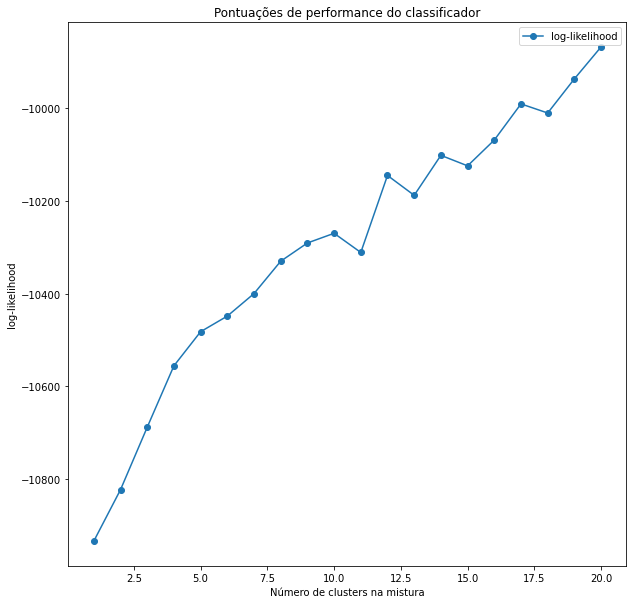

In [23]:
scores = np.array(likelihoods)
plt.figure()
plt.title('Pontuações de performance do classificador')
plt.ylabel('log-likelihood')
plt.xlabel('Número de clusters na mistura')
plt.plot(scores[:,0], scores[:,1], 'o-', label='log-likelihood')
plt.legend()
plt.show()

In [ ]:
em = ExpectationMaximization(20, threshold=0.01, max_iter=100)

em.fit(x1)

[02-May-20 22:37:56] [INFO] [fit(146)] - Calculating EM with 20 clusters.
[02-May-20 22:37:58] [INFO] [fit(181)] - Iteration 1 - log-likehihood =  -4.27e+03 error = inf
[02-May-20 22:38:00] [INFO] [fit(181)] - Iteration 2 - log-likehihood =  -4.25e+03 error = 14.6
[02-May-20 22:38:02] [INFO] [fit(181)] - Iteration 3 - log-likehihood =  -4.25e+03 error = 4.222
[02-May-20 22:38:04] [INFO] [fit(181)] - Iteration 4 - log-likehihood =  -4.25e+03 error = 2.678
[02-May-20 22:38:06] [INFO] [fit(181)] - Iteration 5 - log-likehihood =  -4.25e+03 error = 2.113
[02-May-20 22:38:08] [INFO] [fit(181)] - Iteration 6 - log-likehihood =  -4.24e+03 error = 1.852
[02-May-20 22:38:10] [INFO] [fit(181)] - Iteration 7 - log-likehihood =  -4.24e+03 error = 1.853
[02-May-20 22:38:11] [INFO] [fit(181)] - Iteration 8 - log-likehihood =  -4.24e+03 error = 2.225
[02-May-20 22:38:13] [INFO] [fit(181)] - Iteration 9 - log-likehihood =  -4.24e+03 error = 2.608
[02-May-20 22:38:15] [INFO] [fit(181)] - Iteration 10 - 

[02-May-20 22:40:36] [INFO] [fit(181)] - Iteration 83 - log-likehihood =  -4.23e+03 error = 0.0292
[02-May-20 22:40:38] [INFO] [fit(181)] - Iteration 84 - log-likehihood =  -4.23e+03 error = 0.03099
[02-May-20 22:40:39] [INFO] [fit(181)] - Iteration 85 - log-likehihood =  -4.23e+03 error = 0.03271
[02-May-20 22:40:41] [INFO] [fit(181)] - Iteration 86 - log-likehihood =  -4.23e+03 error = 0.03429
[02-May-20 22:40:43] [INFO] [fit(181)] - Iteration 87 - log-likehihood =  -4.23e+03 error = 0.0357
[02-May-20 22:40:45] [INFO] [fit(181)] - Iteration 88 - log-likehihood =  -4.23e+03 error = 0.03687
[02-May-20 22:40:47] [INFO] [fit(181)] - Iteration 89 - log-likehihood =  -4.23e+03 error = 0.03782
[02-May-20 22:40:49] [INFO] [fit(181)] - Iteration 90 - log-likehihood =  -4.23e+03 error = 0.03855
[02-May-20 22:40:51] [INFO] [fit(181)] - Iteration 91 - log-likehihood =  -4.23e+03 error = 0.03917
[02-May-20 22:40:53] [INFO] [fit(181)] - Iteration 92 - log-likehihood =  -4.23e+03 error = 0.03985
[0

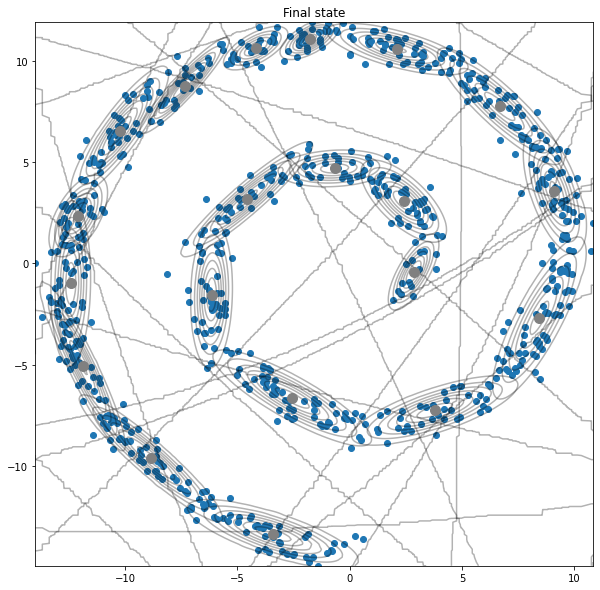

In [8]:
fig3 = plt.figure()
ax2 = fig3.add_subplot(111)
ax2.scatter(x1[:,0],x1[:,1])
x,y = np.meshgrid(np.sort(x1[:,0]),np.sort(x1[:,1]))
XY = np.array([x.flatten(),y.flatten()]).T
for c in em.cluster_stat:
    multi_normal = multivariate_normal(mean=c['mean'],cov=c['sigma'])
    ax2.contour(np.sort(x1[:,0]),np.sort(x1[:,1]),multi_normal.pdf(XY).reshape(len(x1),len(x1)),colors='black',alpha=0.3)
    ax2.scatter(c['mean'][0],c['mean'][1],c='grey',zorder=10,s=100)
    ax2.set_title('Final state')

In [13]:
samples = 300
features = 2

class_1 = np.random.normal(2, 1.5, [samples, features])
class_2 = np.random.normal(8, 1.5, [samples, features])
class_3 = np.random.normal(20, 1.5, [samples, features])

x1 = np.concatenate([class_1, class_2, class_3]) 
# y = np.concatenate(([0 for _ in range(samples)], [1 for _ in range(samples)]))

In [14]:
em = ExpectationMaximization(3, threshold=0.01, max_iter=100)

em.fit(x1)

[02-May-20 22:50:31] [INFO] [fit(146)] - Calculating EM with 3 clusters.
[02-May-20 22:50:31] [INFO] [fit(181)] - Iteration 1 - log-likehihood =  -4555.483 error = inf
[02-May-20 22:50:31] [INFO] [fit(181)] - Iteration 2 - log-likehihood =  -4527.598 error = 27.88
[02-May-20 22:50:31] [INFO] [fit(181)] - Iteration 3 - log-likehihood =  -4522.905 error = 4.693
[02-May-20 22:50:32] [INFO] [fit(181)] - Iteration 4 - log-likehihood =  -4522.021 error = 0.8843
[02-May-20 22:50:32] [INFO] [fit(181)] - Iteration 5 - log-likehihood =  -4521.682 error = 0.3381
[02-May-20 22:50:32] [INFO] [fit(181)] - Iteration 6 - log-likehihood =  -4521.515 error = 0.1677
[02-May-20 22:50:33] [INFO] [fit(181)] - Iteration 7 - log-likehihood =  -4521.416 error = 0.09838
[02-May-20 22:50:33] [INFO] [fit(181)] - Iteration 8 - log-likehihood =  -4521.352 error = 0.06395
[02-May-20 22:50:33] [INFO] [fit(181)] - Iteration 9 - log-likehihood =  -4521.308 error = 0.0442
[02-May-20 22:50:34] [INFO] [fit(181)] - Iterati

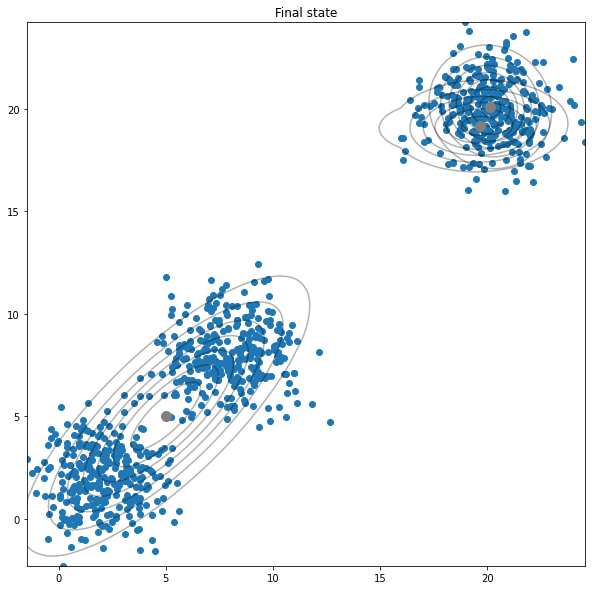

In [15]:
fig3 = plt.figure()
ax2 = fig3.add_subplot(111)
ax2.scatter(x1[:,0],x1[:,1])
x,y = np.meshgrid(np.sort(x1[:,0]),np.sort(x1[:,1]))
XY = np.array([x.flatten(),y.flatten()]).T
for c in em.cluster_stat:
    multi_normal = multivariate_normal(mean=c['mean'],cov=c['sigma'])
    ax2.contour(np.sort(x1[:,0]),np.sort(x1[:,1]),multi_normal.pdf(XY).reshape(len(x1),len(x1)),colors='black',alpha=0.3)
    ax2.scatter(c['mean'][0],c['mean'][1],c='grey',zorder=10,s=100)
    ax2.set_title('Final state')